In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load datasets
math_data = pd.read_csv('student-mat.csv', delimiter=';')
portuguese_data = pd.read_csv('student-por.csv', delimiter=';')

# Combine datasets
data = pd.concat([math_data, portuguese_data], ignore_index=True)

# Drop duplicates
data = data.drop_duplicates()

# Feature selection and preprocessing
features = ['studytime', 'failures', 'paid', 'higher', 'internet', 'health', 'absences']
target = 'schoolsup'

# Encode categorical variables
label_encoders = {}
for feature in ['paid', 'higher', 'internet', 'schoolsup']:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    label_encoders[feature] = le

# Define features and target variable
X = data[features]
y = data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


KeyError: 'study'

Accuracy: 0.89


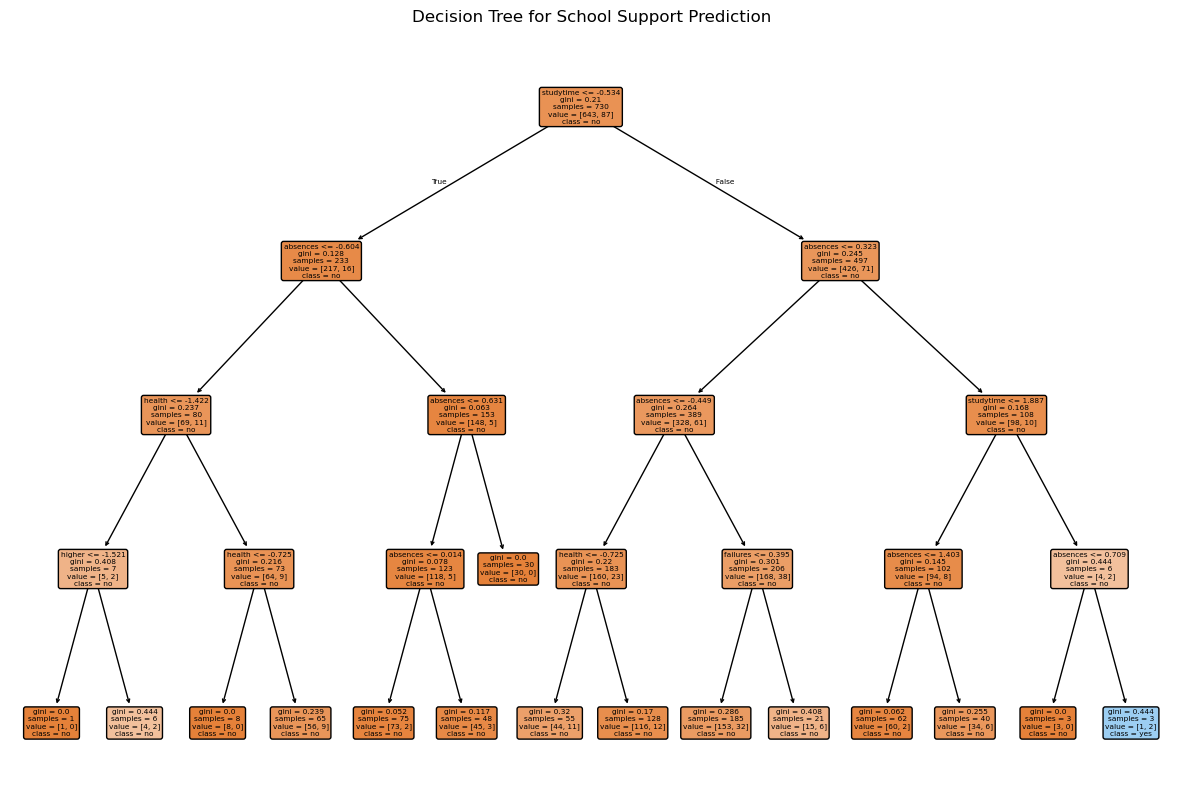

In [56]:
# Initialize and train the Decision Tree classifier with constraints
clf = DecisionTreeClassifier(max_depth=4, min_samples_split=5, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
accuracy = clf.score(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

# Plot the decision tree
plt.figure(figsize=(15,10))
plot_tree(clf, feature_names=features, class_names=label_encoders[target].classes_, filled=True, rounded=True)
plt.title('Decision Tree for School Support Prediction')
plt.show()
